# Initial Exploratory Data Analysis

## Conceptualizing the data at hand

This data is the compiled rainfall over the years measured by a rain gauge (*pluviometer*) located in a small rural property, located in southern Minas Gerais state, in Brazil. These measurements are important for the following reasons:

- It is a productive grain farm, with yearly yields of maize, soy beans, and sorghum
- The property is run a small family business, so budget projection, investment calculation, and estimated returns are very important in each planting and harvesting cycle
- Due to physical restraints such as high slopes, difficult access to the local river, and the river not being suitable (not big enough) to provide irrigation to local farmers, the production hinges entirely on the rain cycle for the year. The rains directly affect planting and harvesting dynamics.

The property is located roughly at the 23 K UTM¹ zone coordinates of longitude $ 295496.22 m E$ and  latitude $ 7637083.25 m S$. Being situated in the subtropical, semi-humid, mid-warm, climate range, with 3 dry months and 1 wet month, with yearly temperatures averaging between 15°C to 18°C².

<center> <img src= '../notebooks/notebook_images/image_1.png'/> </center>

We'll explore the dataset with the following goals in mind:

1. Rainfall correlations to noticiable drought periods
2. Best visualization for the present data
3. Establish some form of periodicity or seasonality in the rainfall & drought cycles

¹- *Universal Transverse Mercator* projection

²- Souce - [Brazilian Institute of Greography and Statistics; Climate Domains Map](https://geoftp.ibge.gov.br/informacoes_ambientais/climatologia/mapas/brasil/Map_BR_clima_2002.pdf)

Basic data exploration imports:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

Loading the dataset:

In [2]:
PATH = os.path.abspath(r"..\data").replace('\\','/') + '/processed/rainfall_time_data.xlsx'

df = pd.read_excel(PATH)

df.head()

,Unnamed: 0,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,total
0,2014,60.0,101.5,133.5,117.0,16.5,5.0,52.0,0.0,39.0,35.0,262.0,197.0,1018.5
1,2015,100.5,178.5,273.5,90.0,71.5,41.0,2.0,30.0,121.5,101.5,301.5,115.5,1427.0
2,2016,226.0,227.0,264.0,5.0,116.0,140.0,0.0,63.0,16.5,120.5,120.5,226.5,1525.0
3,2017,274.0,90.0,227.5,68.0,93.5,99.0,0.0,12.5,25.0,65.0,277.0,154.5,1386.0
4,2018,265.0,189.0,106.0,45.0,41.5,8.0,0.0,80.0,68.5,315.0,240.5,133.9,1492.4


Setting the years column as an index for the data:

In [3]:
df.rename(columns={'Unnamed: 0': 'years'}, inplace=True)

df.set_index('years')

df

,years,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,total
0,2014,60.0,101.5,133.5,117.0,16.5,5.0,52.0,0.0,39.0,35.0,262.0,197.0,1018.5
1,2015,100.5,178.5,273.5,90.0,71.5,41.0,2.0,30.0,121.5,101.5,301.5,115.5,1427.0
2,2016,226.0,227.0,264.0,5.0,116.0,140.0,0.0,63.0,16.5,120.5,120.5,226.5,1525.0
3,2017,274.0,90.0,227.5,68.0,93.5,99.0,0.0,12.5,25.0,65.0,277.0,154.5,1386.0
4,2018,265.0,189.0,106.0,45.0,41.5,8.0,0.0,80.0,68.5,315.0,240.5,133.9,1492.4
5,2019,106.0,254.0,291.5,217.5,50.0,0.0,17.5,18.0,62.5,136.5,235.0,179.5,1568.0
6,2020,404.5,253.5,161.5,20.0,20.0,94.5,0.0,0.0,55.0,80.5,150.0,315.5,1555.0
7,2021,212.5,190.5,137.5,9.5,3.0,15.0,5.0,0.0,13.0,328.5,188.0,148.5,1251.0


According to the metadata, these numbers correspond to the monthly average of rainfall for each month in each year. Adding an yeraly average column will help us visualize which years rained more and which ones rained less:

In [4]:
yearly_avg = round(df["total"]/12, 1)

df["yearly_avg"] = yearly_avg

df

,years,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,total,yearly_avg
0,2014,60.0,101.5,133.5,117.0,16.5,5.0,52.0,0.0,39.0,35.0,262.0,197.0,1018.5,84.9
1,2015,100.5,178.5,273.5,90.0,71.5,41.0,2.0,30.0,121.5,101.5,301.5,115.5,1427.0,118.9
2,2016,226.0,227.0,264.0,5.0,116.0,140.0,0.0,63.0,16.5,120.5,120.5,226.5,1525.0,127.1
3,2017,274.0,90.0,227.5,68.0,93.5,99.0,0.0,12.5,25.0,65.0,277.0,154.5,1386.0,115.5
4,2018,265.0,189.0,106.0,45.0,41.5,8.0,0.0,80.0,68.5,315.0,240.5,133.9,1492.4,124.4
5,2019,106.0,254.0,291.5,217.5,50.0,0.0,17.5,18.0,62.5,136.5,235.0,179.5,1568.0,130.7
6,2020,404.5,253.5,161.5,20.0,20.0,94.5,0.0,0.0,55.0,80.5,150.0,315.5,1555.0,129.6
7,2021,212.5,190.5,137.5,9.5,3.0,15.0,5.0,0.0,13.0,328.5,188.0,148.5,1251.0,104.2


We can observe that 2014 was, by a wide margin, the year with the least amount of rain in average, while 2019 was the year that rained the most.

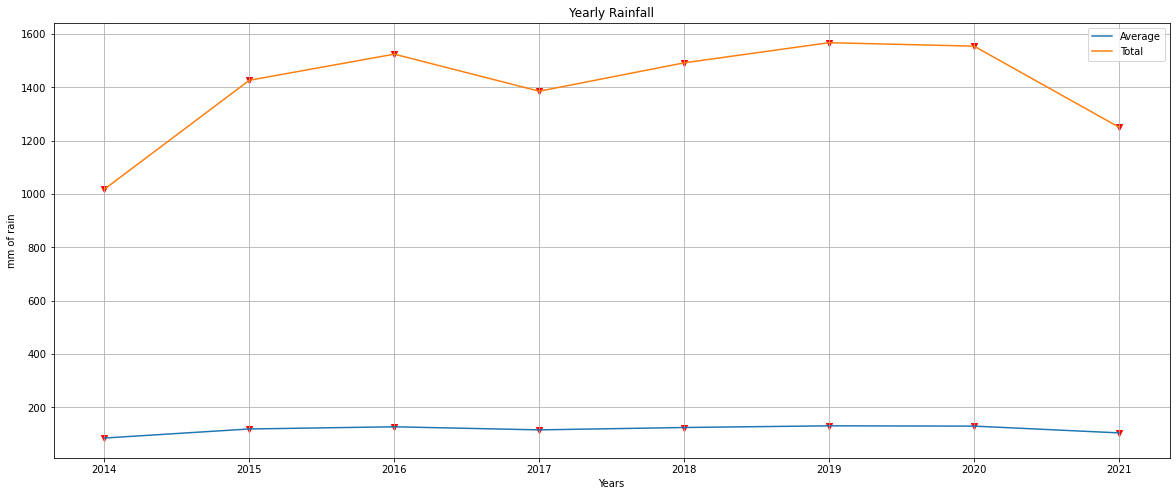

In [5]:
x = df['years']
y = df['yearly_avg']
y2 = df['total']

plt.figure(figsize=(20, 8))
plt.plot(x, y)
plt.plot(x, y2)
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('mm of rain')
plt.title('Yearly Rainfall')
plt.scatter(x,
            y,
            color='r',
            marker='v')
plt.scatter(x,
            y2,
            color='r',
            marker='v')
plt.legend(['Average', 'Total'])

plt.show()

As expected, 2014 was the lowest and 2019 was the highest. This is strongly correlated to the [2014-2017 Brazilian Drought](https://en.wikipedia.org/wiki/2014%E2%80%932017_Brazilian_drought), which saw major metropolitan areas of southeastern Brazil with reduced to none rainfall over months and severe water rationing and cutoffs. However, the yearly rain averege cannot tell us the distribution in each year. Let's try to visualize that by using a heatmap, since we are dealing with 2D data:

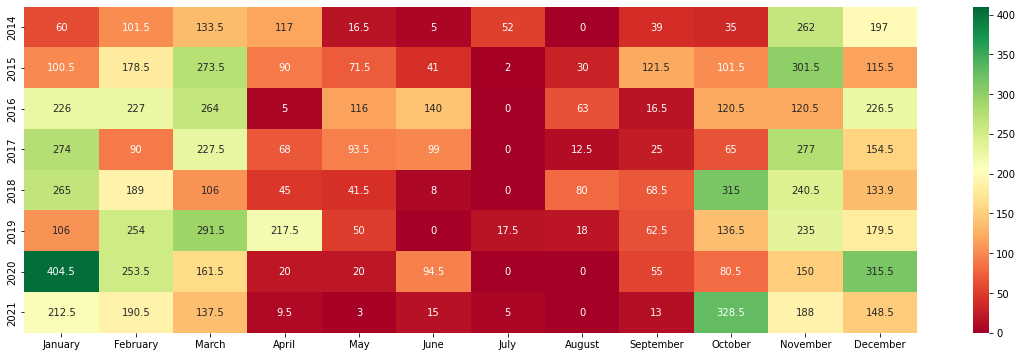

In [6]:
import calendar

months = list(calendar.month_name)
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

df_copy = df.copy(deep=True)
df_copy.drop(['years', 'yearly_avg', 'total'],
             axis=1,
             inplace=True)
plt.figure(figsize=(20,6))

x_axis_labels = months[1:]
y_axis_labels = years
g = sns.heatmap(df_copy,
                annot=True,
                fmt='g',
                vmax=410,
                cmap='RdYlGn',
                xticklabels=x_axis_labels,
                yticklabels=y_axis_labels)

This heatmap provides some interisting visualization and, at the same time, some insights regarding our initial hypotheses:

1. There is clearly a dry period between April and September, with some moving overlap along the years.
2. The rainy period has some spikes of rain during December and January.
3. 2014 was a very dry year, with the rainy period being the driest overall. This correlates to the regional draught event ocurring in the same region in Brazil at the time.
4. Although 2019 has the most rain total and average of all the years, it was spread around all the months of said year.
5. This pattern is compatible with the Brazilian climate model the study area is located.

Although we can see such patterns, it's prudent to emphasize that the scale of such measurements are in a very local, restricted area. Further extrapolation cannot be done due to the scale and methods employed in the data gathering. Nevertheless, it's interesting to see if the model has any kind of seazonality, which we'll explore now.